In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [4]:
df['surgery'] = df['surgery'].map({'yes':0, 'no':1})

In [5]:
df.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [6]:
df['age'].unique()

array(['adult', 'young'], dtype=object)

In [7]:
df['age'] = df['age'].map({'adult':0, 'young':1})

In [8]:
df['temp_of_extremities'].mode()[0]

'cool'

In [9]:
df['temp_of_extremities'] = df['temp_of_extremities'].fillna(df['temp_of_extremities'].mode()[0])

In [10]:
df['temp_of_extremities'].unique()

array(['cool', 'cold', 'normal', 'warm'], dtype=object)

In [11]:
df['temp_of_extremities'] = df['temp_of_extremities'].map({'cool':1, 'cold':2, 'normal':3, 'warm':4})

In [12]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,0,0,530001,38.1,132.0,24.0,1,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,0,0,533836,37.5,88.0,12.0,1,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,0,0,529812,38.3,120.0,28.0,1,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,0,0,5262541,37.1,72.0,30.0,2,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,1,0,5299629,38.0,52.0,48.0,3,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [13]:
df['peripheral_pulse'] = df['peripheral_pulse'].fillna(df['peripheral_pulse'].mode()[0])

In [14]:
df['peripheral_pulse'].unique()

array(['reduced', 'normal', 'absent', 'increased'], dtype=object)

In [15]:
df['peripheral_pulse'] = df['peripheral_pulse'].map({'reduced':1 , 'normal':2 , 'absent':3 , 'increased':4})

In [16]:
df['mucous_membrane'].unique()

array(['dark_cyanotic', 'pale_cyanotic', 'pale_pink', 'normal_pink',
       'bright_pink', 'bright_red', nan], dtype=object)

In [17]:
df['mucous_membrane'] = df['mucous_membrane'].fillna(df['mucous_membrane'].mode()[0])

In [18]:
df['mucous_membrane'] = df['mucous_membrane'].map({'dark_cyanotic':1, 'pale_cyanotic':2, 'pale_pink':3, 'normal_pink':4,
       'bright_pink':5, 'bright_red':6})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   int64  
 2   age                    1235 non-null   int64  
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   int64  
 8   peripheral_pulse       1235 non-null   int64  
 9   mucous_membrane        1235 non-null   int64  
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [20]:
df['capillary_refill_time'] = df['capillary_refill_time'].map({'more_3_sec':4, 'less_3_sec':2,'3':3})

In [21]:
df['capillary_refill_time'] = df['capillary_refill_time'].fillna(df['capillary_refill_time'].mode()[0])

In [22]:
df['pain'] = df['pain'].map({'depressed':1, 'mild_pain':2, 'extreme_pain':3, 'alert':4, 'severe_pain':5,'slight':6})

In [23]:
df['pain'] = df['pain'].fillna(df['pain'].mode()[0])

In [24]:
df['peristalsis'] = df['peristalsis'].map({'absent':1, 'hypomotile':2, 'normal':3, 'hypermotile':4,'distend_small':6})

In [25]:
df['peristalsis'] = df['peristalsis'].fillna(df['peristalsis'].mode()[0])

In [26]:
df['abdominal_distention'].map({'slight':1 , 'moderate':2 , 'none' :3 , 'severe':4})

0       1.0
1       2.0
2       2.0
3       2.0
4       3.0
       ... 
1230    2.0
1231    1.0
1232    1.0
1233    1.0
1234    3.0
Name: abdominal_distention, Length: 1235, dtype: float64

In [27]:
df['abdominal_distention'] = df['abdominal_distention'].fillna(df['abdominal_distention'].mode()[0])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   int64  
 2   age                    1235 non-null   int64  
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   int64  
 8   peripheral_pulse       1235 non-null   int64  
 9   mucous_membrane        1235 non-null   int64  
 10  capillary_refill_time  1235 non-null   float64
 11  pain                   1235 non-null   float64
 12  peristalsis            1235 non-null   float64
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [29]:
df['abdominal_distention'] = df['abdominal_distention'].map({'slight':1, 'moderate':2, 'none':0, 'severe':3})

In [30]:
df['nasogastric_tube'].unique()

array(['slight', 'none', 'significant', nan], dtype=object)

In [31]:
df['nasogastric_tube'] = df['nasogastric_tube'].fillna(df['nasogastric_tube'].mode()[0])

In [32]:
df['nasogastric_tube'] = df['nasogastric_tube'].map({'slight':1, 'none':0, 'significant':2})

In [33]:
df['nasogastric_reflux'] = df['nasogastric_reflux'].fillna(df['nasogastric_reflux'].mode()[0])

In [34]:
df['nasogastric_reflux'] = df['nasogastric_reflux'].map({'less_1_liter':2, 'more_1_liter':3, 'none':0, 'slight':1})

In [35]:
df['rectal_exam_feces'] = df['rectal_exam_feces'].fillna(df['rectal_exam_feces'].mode()[0])

In [36]:
df['rectal_exam_feces'] = df['rectal_exam_feces'].map({'decreased': 1, 'absent': 0, 'normal':2, 'increased':3, 'serosanguious':4})

In [37]:
df['abdomen'] = df['abdomen'].fillna(df['abdomen'].mode()[0])

In [38]:
df['abdomen']= df['abdomen'].map({'distend_small':1, 'distend_large':2, 'normal':3, 'firm':4, 'other':5})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   int64  
 2   age                    1235 non-null   int64  
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   int64  
 8   peripheral_pulse       1235 non-null   int64  
 9   mucous_membrane        1235 non-null   int64  
 10  capillary_refill_time  1235 non-null   float64
 11  pain                   1235 non-null   float64
 12  peristalsis            1235 non-null   float64
 13  abdominal_distention   1235 non-null   int64  
 14  nasogastric_tube       1235 non-null   int64  
 15  naso

In [40]:
df['abdomo_appearance'] = df['abdomo_appearance'].fillna(df['abdomo_appearance'].mode()[0])

In [41]:
df['abdomo_appearance'] = df['abdomo_appearance'].map({'serosanguious': 1, 'cloudy': 2, 'clear':3 })

In [42]:
df['surgical_lesion'] = df['surgical_lesion'].map({'yes':1, 'no':0})

In [43]:
df['cp_data'] = df['cp_data'].map({'yes':1, 'no':0})

In [44]:
df['outcome'] = df['outcome'].map({'died': 0, 'euthanized' : 1 , 'lived': 2})

In [45]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,0,0,530001,38.1,132.0,24.0,1,1,1,...,57.0,8.5,1,3.4,1,2209,0,0,0,0
1,1,0,0,533836,37.5,88.0,12.0,1,2,2,...,33.0,64.0,1,2.0,1,2208,0,0,0,1
2,2,0,0,529812,38.3,120.0,28.0,1,1,3,...,37.0,6.4,1,3.4,1,5124,0,0,0,2
3,3,0,0,5262541,37.1,72.0,30.0,2,1,3,...,53.0,7.0,2,3.9,1,2208,0,0,1,2
4,4,1,0,5299629,38.0,52.0,48.0,3,2,4,...,47.0,7.3,2,2.6,0,0,0,0,1,2


In [46]:
df.drop("id", axis = 1,inplace = True)

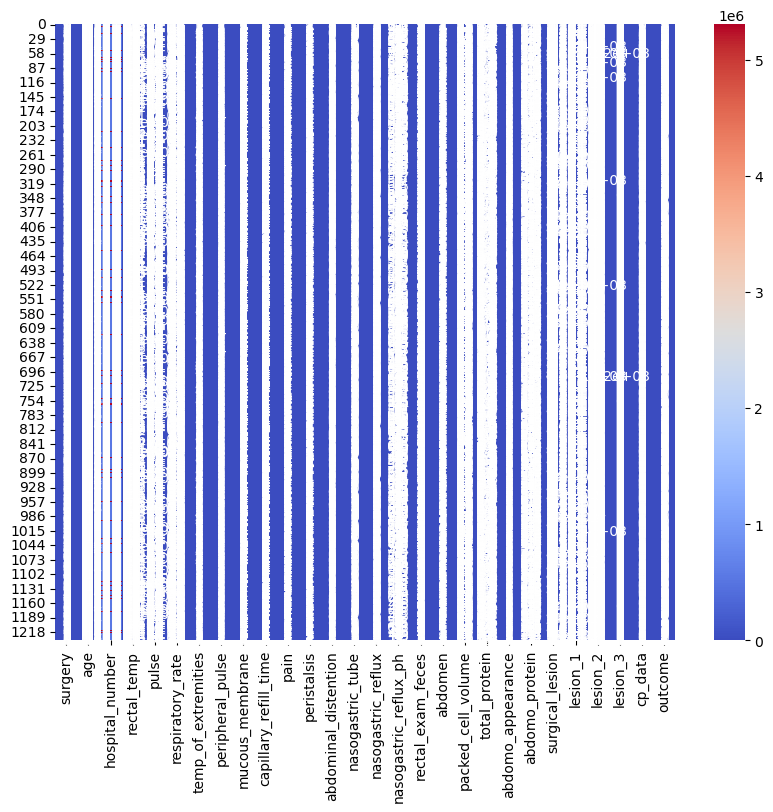

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="coolwarm")
plt.show()


In [48]:
df.corr()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
surgery,1.000000,-0.053761,-0.050706,0.058994,-0.134159,-0.108996,0.147196,0.143433,0.094405,-0.067726,...,-0.049160,-0.121621,0.208296,0.127531,-0.511866,-0.074054,0.023602,-0.025227,0.179764,0.152502
age,-0.053761,1.000000,0.158483,0.062943,0.279871,0.189649,-0.034544,-0.018825,0.028307,0.066056,...,-0.042230,-0.109876,-0.060661,0.074228,0.083109,-0.000197,-0.019189,-0.010241,0.077785,-0.176527
hospital_number,-0.050706,0.158483,1.000000,-0.002552,0.118391,0.085008,0.013918,0.029245,-0.035637,0.014613,...,-0.018028,-0.154746,-0.024991,0.141800,0.067444,0.030844,0.022098,-0.012575,0.047859,-0.104766
rectal_temp,0.058994,0.062943,-0.002552,1.000000,0.176761,0.124377,-0.022954,0.022403,0.046478,0.096694,...,0.088986,-0.060842,-0.023415,0.043342,-0.022199,0.021711,-0.022823,-0.005220,-0.007751,0.005517
pulse,-0.134159,0.279871,0.118391,0.176761,1.000000,0.395130,-0.288663,-0.374783,-0.210522,0.450044,...,0.435102,0.004373,-0.388934,0.056391,0.234095,0.000037,0.021804,0.028273,-0.107638,-0.330282
respiratory_rate,-0.108996,0.189649,0.085008,0.124377,0.395130,1.000000,-0.095898,-0.112289,-0.054506,0.195251,...,0.188777,0.004018,-0.188837,0.004287,0.119134,0.020502,-0.010536,0.009663,-0.021069,-0.185242
temp_of_extremities,0.147196,-0.034544,0.013918,-0.022954,-0.288663,-0.095898,1.000000,0.437047,0.127263,-0.227218,...,-0.237710,-0.105148,0.375943,0.090317,-0.222915,-0.002810,0.001602,-0.030661,0.129736,0.233451
peripheral_pulse,0.143433,-0.018825,0.029245,0.022403,-0.374783,-0.112289,0.437047,1.000000,0.167048,-0.293388,...,-0.297117,-0.111216,0.320291,0.052956,-0.227446,-0.019467,-0.019233,-0.029105,0.136797,0.253440
mucous_membrane,0.094405,0.028307,-0.035637,0.046478,-0.210522,-0.054506,0.127263,0.167048,1.000000,-0.213498,...,-0.176518,-0.097426,0.206114,-0.006360,-0.027834,0.060313,0.019204,0.000851,0.085742,0.131426
capillary_refill_time,-0.067726,0.066056,0.014613,0.096694,0.450044,0.195251,-0.227218,-0.293388,-0.213498,1.000000,...,0.417664,-0.027618,-0.324923,0.043591,0.163616,-0.001068,-0.039129,-0.027592,-0.132983,-0.283319


In [49]:
X = df.drop("outcome",axis=1)   #Feature Matrix
y = df["outcome"] 

In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((864, 27), (371, 27))

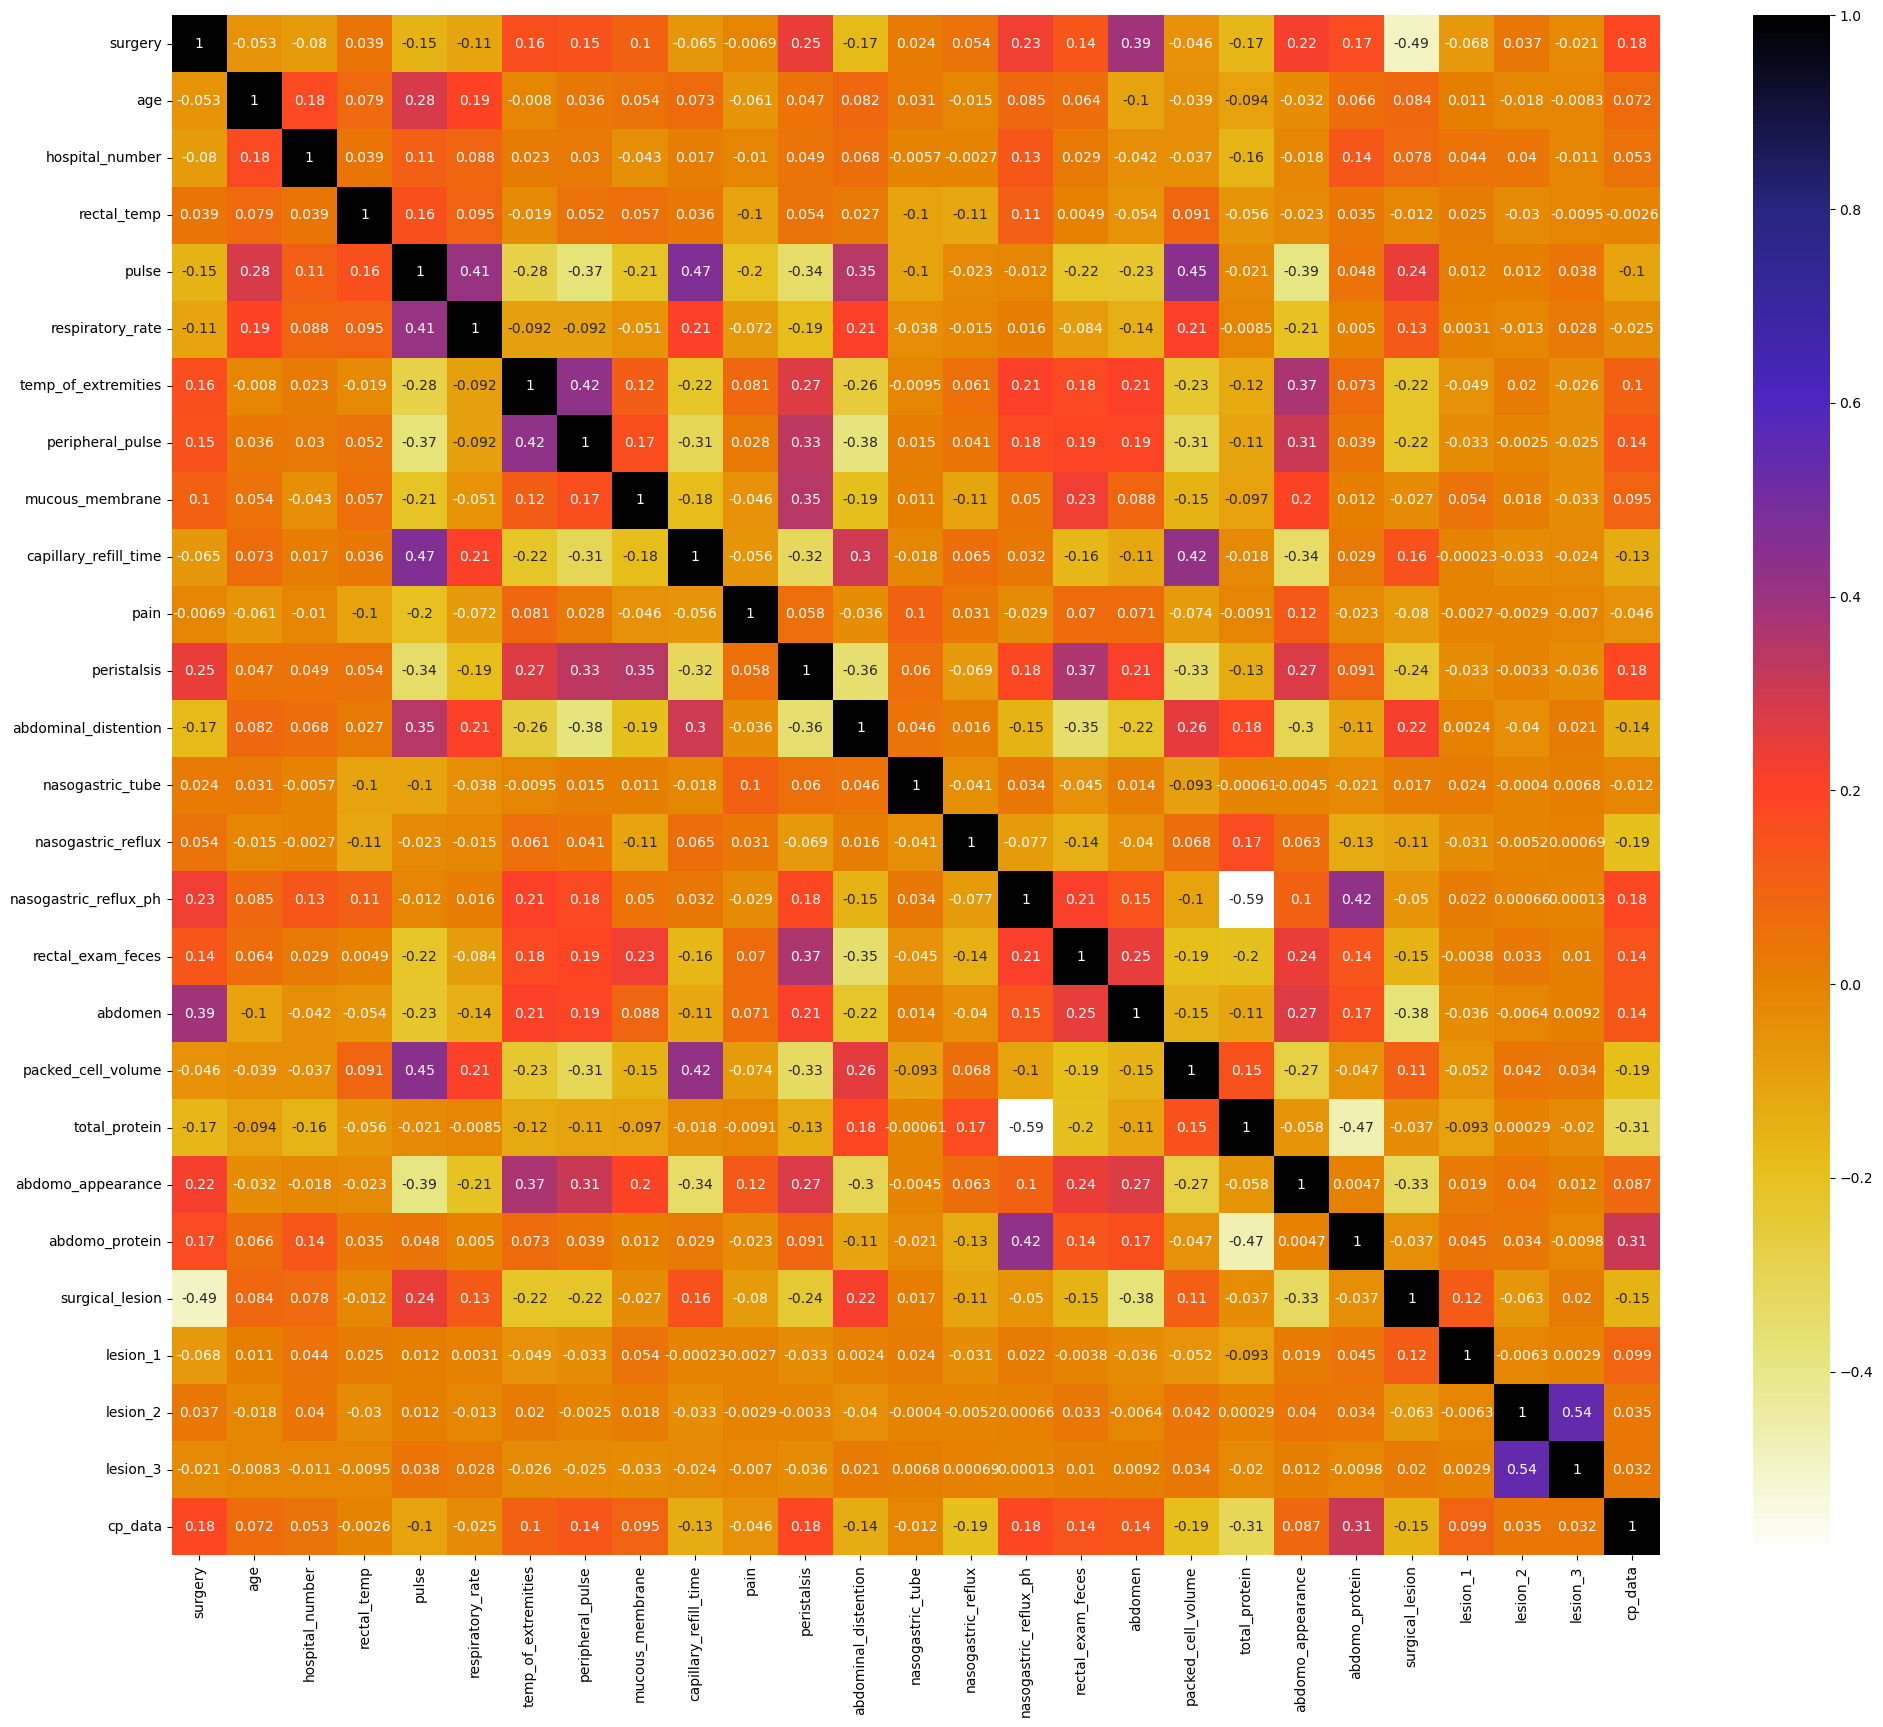

In [51]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0

In [54]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [55]:
### Finding non constant features
sum(var_thres.get_support())

27

In [56]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [57]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.04988881, 0.02622423, 0.18874622, 0.00172927, 0.16898052,
       0.08545469, 0.08198643, 0.04468743, 0.08047585, 0.03890485,
       0.13468523, 0.06233349, 0.07058714, 0.02957869, 0.04187092,
       0.14668704, 0.01383234, 0.03317138, 0.08847055, 0.11747342,
       0.04208774, 0.11044923, 0.06740076, 0.20388711, 0.00440724,
       0.00461699, 0.02793917])

In [58]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

lesion_1                 0.203887
hospital_number          0.188746
pulse                    0.168981
nasogastric_reflux_ph    0.146687
pain                     0.134685
total_protein            0.117473
abdomo_protein           0.110449
packed_cell_volume       0.088471
respiratory_rate         0.085455
temp_of_extremities      0.081986
mucous_membrane          0.080476
abdominal_distention     0.070587
surgical_lesion          0.067401
peristalsis              0.062333
surgery                  0.049889
peripheral_pulse         0.044687
abdomo_appearance        0.042088
nasogastric_reflux       0.041871
capillary_refill_time    0.038905
abdomen                  0.033171
nasogastric_tube         0.029579
cp_data                  0.027939
age                      0.026224
rectal_exam_feces        0.013832
lesion_3                 0.004617
lesion_2                 0.004407
rectal_temp              0.001729
dtype: float64

<Axes: >

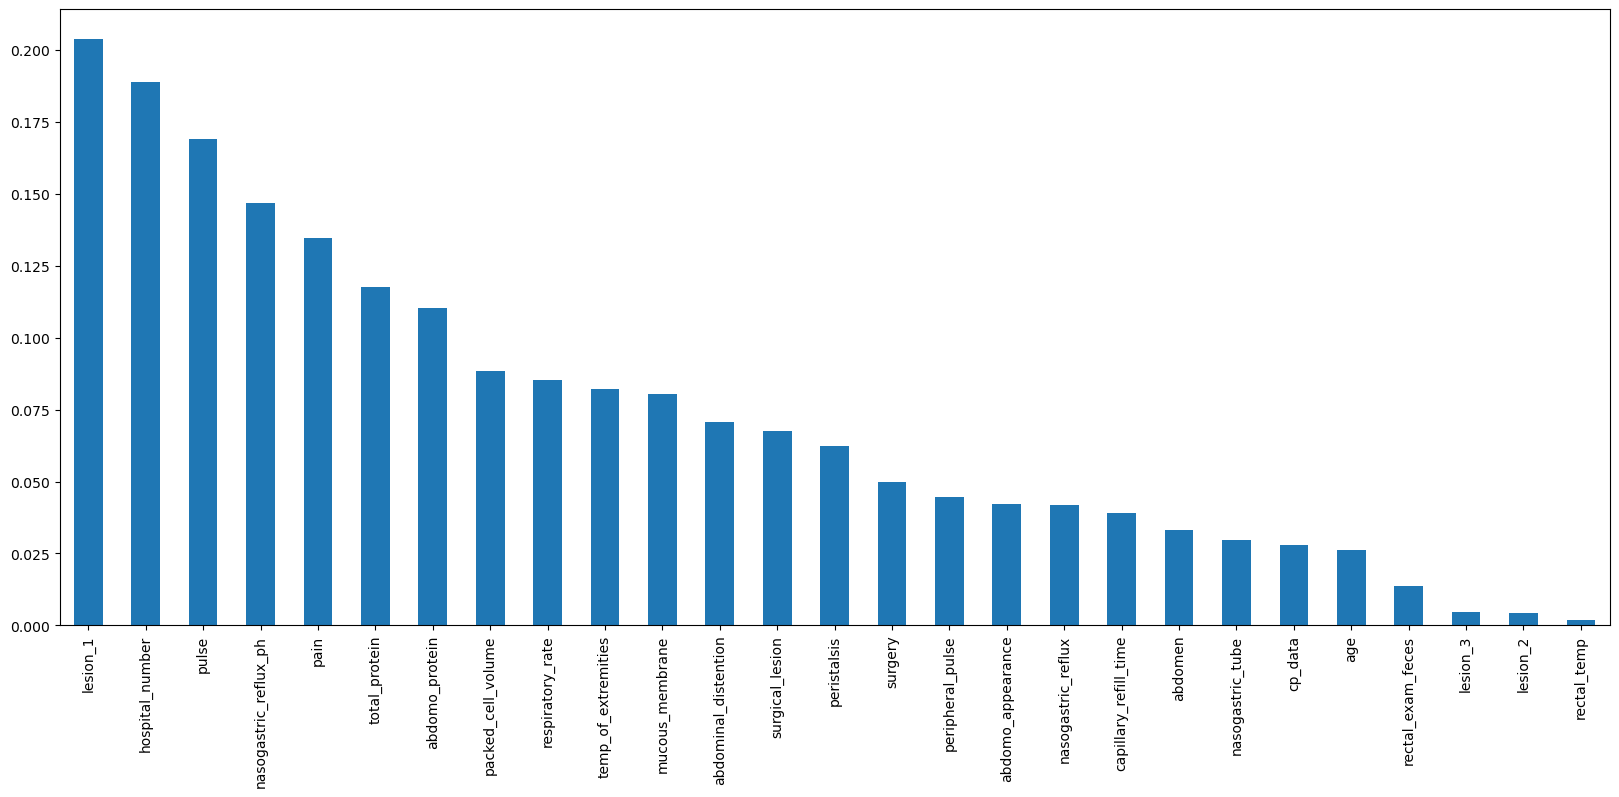

In [59]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [60]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 20 important features
cols = SelectKBest(mutual_info_classif, k=20)
cols.fit(X_train, y_train)
X_train_ind = X_train.columns[cols.get_support()]

In [61]:
K =  X_train[0:0]

In [62]:
print(K)

Empty DataFrame
Columns: [surgery, age, hospital_number, rectal_temp, pulse, respiratory_rate, temp_of_extremities, peripheral_pulse, mucous_membrane, capillary_refill_time, pain, peristalsis, abdominal_distention, nasogastric_tube, nasogastric_reflux, nasogastric_reflux_ph, rectal_exam_feces, abdomen, packed_cell_volume, total_protein, abdomo_appearance, abdomo_protein, surgical_lesion, lesion_1, lesion_2, lesion_3, cp_data]
Index: []

[0 rows x 27 columns]


In [63]:
for i in K:
    if i not in X_train_ind:
        X_train.drop(i , axis = 1,inplace = True)
        X_test.drop(i , axis = 1,inplace = True)

In [64]:
X_train

,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_reflux_ph,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,cp_data
565,0,528469,39.0,88.0,28.0,3,1,4.0,5.0,1.0,2,7.0,1,64.0,7.6,2,2.6,1,2208,0
799,0,530254,38.6,80.0,32.0,1,3,2.0,3.0,1.0,1,6.5,1,33.0,6.5,1,4.5,1,3205,0
272,0,5290409,37.2,108.0,48.0,2,3,4.0,3.0,2.0,2,5.4,2,55.0,6.5,1,4.5,0,4205,1
1070,0,529340,38.0,48.0,20.0,3,4,2.0,2.0,2.0,1,5.0,4,40.0,6.5,3,1.5,0,9400,1
165,0,529272,38.1,112.0,84.0,1,2,4.0,2.0,2.0,2,5.0,1,48.0,8.0,1,2.6,0,3133,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,534917,38.8,44.0,12.0,1,3,2.0,2.0,1.0,2,4.4,1,40.0,67.0,2,2.0,1,2209,1
835,0,5301219,39.9,96.0,24.0,1,3,2.0,3.0,1.0,2,6.0,2,45.0,7.5,1,2.3,1,3205,1
1216,0,534293,38.5,132.0,48.0,1,2,4.0,1.0,1.0,3,2.0,1,57.0,82.0,2,2.0,0,1400,0
559,0,533692,38.7,120.0,10.0,1,4,2.0,5.0,3.0,0,1.0,3,34.0,75.0,3,1.0,1,3111,0


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [67]:
# Choose a classification algorithm (e.g., Random Forest, Logistic Regression, SVM)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [68]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [70]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [71]:
cv_scores = cross_val_score(model, X, y, cv=5)

In [72]:

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)
print("\nCross-Validation Scores:", cv_scores)

Accuracy: 0.7142857142857143

Confusion Matrix:
 [[ 98   3  29]
 [ 11  43  16]
 [ 38   9 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       130
           1       0.78      0.61      0.69        70
           2       0.73      0.73      0.73       171

    accuracy                           0.71       371
   macro avg       0.73      0.70      0.71       371
weighted avg       0.72      0.71      0.71       371


Cross-Validation Scores: [0.66396761 0.70850202 0.72874494 0.64777328 0.68825911]


In [73]:
#from sklearn.svm import SVC 
# Create an SVM classifier
model = SVC(kernel='linear', C=1.0, random_state=42)  # You can experiment with different kernels and hyperparameters

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Cross-validation for more robust evaluation (optional)
cv_scores = cross_val_score(model, X, y, cv=5)


NameError: name 'SVC' is not defined

In [ ]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)
print("\nCross-Validation Scores:", cv_scores)

In [76]:
import xgboost as xgb   
# Create an XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate (controls step size during training)
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Cross-validation for more robust evaluation (optional)
cv_scores = cross_val_score(model, X, y, cv=5)

In [77]:
# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)
print("\nCross-Validation Scores:", cv_scores)


Accuracy: 0.7628032345013477

Confusion Matrix:
 [[105   4  21]
 [  9  47  14]
 [ 35   5 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       130
           1       0.84      0.67      0.75        70
           2       0.79      0.77      0.78       171

    accuracy                           0.76       371
   macro avg       0.78      0.75      0.76       371
weighted avg       0.77      0.76      0.76       371


Cross-Validation Scores: [0.69635628 0.76518219 0.72469636 0.67206478 0.71255061]


In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6495956873315364

Confusion Matrix:
 [[ 89   7  34]
 [ 16  33  21]
 [ 41  11 119]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.68      0.64       130
           1       0.65      0.47      0.55        70
           2       0.68      0.70      0.69       171

    accuracy                           0.65       371
   macro avg       0.65      0.62      0.63       371
weighted avg       0.65      0.65      0.65       371



In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.568733153638814

Confusion Matrix:
 [[ 65  20  45]
 [  7  34  29]
 [ 38  21 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.50      0.54       130
           1       0.45      0.49      0.47        70
           2       0.60      0.65      0.63       171

    accuracy                           0.57       371
   macro avg       0.55      0.55      0.55       371
weighted avg       0.57      0.57      0.57       371



In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6792452830188679

Confusion Matrix:
 [[ 92  11  27]
 [ 13  46  11]
 [ 32  25 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       130
           1       0.56      0.66      0.61        70
           2       0.75      0.67      0.71       171

    accuracy                           0.68       371
   macro avg       0.66      0.68      0.67       371
weighted avg       0.69      0.68      0.68       371



In [90]:
X_train.shape



(864, 20)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
   
)

In [93]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100, callbacks = early_stop)

Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: -0.1090 - accuracy: 0.3495 - val_loss: -1.2877 - val_accuracy: 0.3252
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: -0.6189 - accuracy: 0.3028 - val_loss: -1.4289 - val_accuracy: 0.3252
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: -0.8486 - accuracy: 0.3028 - val_loss: -1.3909 - val_accuracy: 0.3252
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: -0.8454 - accuracy: 0.3028 - val_loss: -1.3911 - val_accuracy: 0.3252
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: -0.8036 - accuracy: 0.3028 - val_loss: -1.4396 - val_accuracy: 0.3252
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: -0.8179 - accuracy: 0.3028 - val_loss: -1.4396 - val_accuracy: 0.3252
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: -0.8179 - accuracy: 0.3028 - val_loss: -1.4396 - val_accuracy: 0.3252

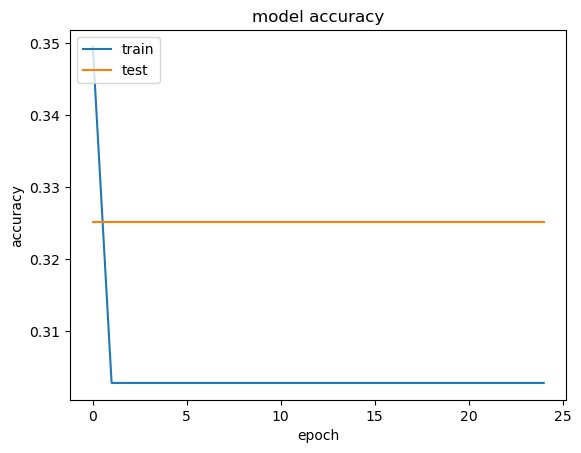

In [94]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

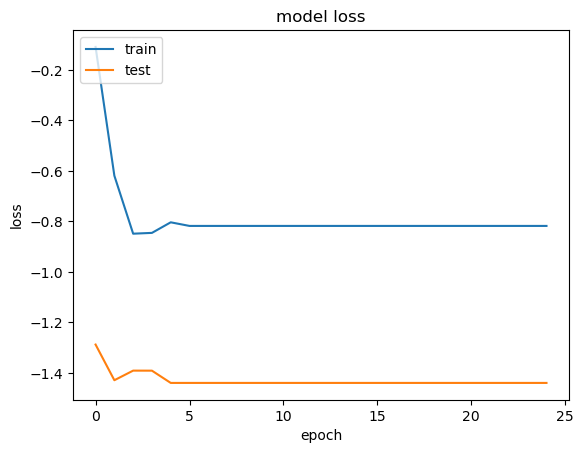

In [95]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()